# All the results and visualizations for the Sampta Paper

In [9]:
#Import everything
from Main.test_manifold_algorithms import test_manifold_algorithms as tma
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from Helpers.regression_helpers import *

## Checking if we have our data run

### Regression

In [10]:
reg_df = read_json_files_to_dataframe("/yunity/arusty/Graph-Manifold-Alignment/Results/GRAE_Data")
print(f"File Length: {len(reg_df)}")
reg_df.sample(5)

File Length: 3095


,method,csv_file,split,Percent_of_Anchors,Best_Params,CE,FOSCTTM,Random Forest OOB,Random Forest Emb A,Random Forest Emb B,Nearest Neighbor A,Nearest Neighbor B,Nearest Neighbor (F1 score or RMSE) A,Nearest Neighbor (F1 score or RMSE) B,Random Forest (F1 score or RMSE) A,Random Forest (F1 score or RMSE) B,GRAE,Parameter STD
2724,RF-MASH-,balance_scale,distort,0.3,"{'knn': 15, 'page_rank': 'full', 'DTM': 'log',...","{'42': 0.9232, '1738': 0.9248, '5271': 0.912, ...","{'42': 0.057916159999999994, '1738': 0.0596543...","{'42': 0.941, '1738': 0.938, '5271': 0.927, '9...","{'42': 0.248, '1738': 0.208, '5271': 0.4, '920...","{'42': 0.792, '1738': 0.392, '5271': 0.408, '9...","{'42': 0.112, '1738': 0.08, '5271': 0.072, '92...","{'42': 0.712, '1738': 0.768, '5271': 0.632, '9...","{'42': 0.06007363235675395, '1738': 0.05175493...","{'42': 0.7188689726115468, '1738': 0.761230073...","{'42': 0.25836893445169307, '1738': 0.26172914...","{'42': 0.7874750860025992, '1738': 0.493193330...","{'42': {'RF-OOB': 0.951, 'KNN_A': 0.864, 'RF_A...","{'knn': 0.16280509735189377, 'page_rank': 0.01..."
576,DTA,heart_disease,distort,0.3,"{'knn': 32, 'distances': 'DPT'}","{'42': 0.7823834196891192, '1738': 0.756476683...","{'42': 0.0035370077049048294, '1738': 0.003335...","{'42': 0.900974025974026, '1738': 0.6964285714...","{'42': 0.6923076923076923, '1738': 0.5, '5271'...","{'42': 0.6538461538461539, '1738': 0.525641025...","{'42': 0.5384615384615384, '1738': 0.5, '5271'...","{'42': 0.5384615384615384, '1738': 0.512820512...","{'42': 0.4493127954666416, '1738': 0.435520889...","{'42': 0.4338031745450178, '1738': 0.451736557...","{'42': 0.6581019784639693, '1738': 0.462597837...","{'42': 0.6026215614450907, '1738': 0.488875415...","{'42': {'RF-OOB': 0.9217791411042945, 'KNN_A':...",{}
223,NAMA,heart_failure,even,0.3,"{'OD_method': 'absolute_distance', 'agg_method...",{'42': 0.6354515050167224},{'42': 1.1185557208532343e-05},{'42': 0.698744769874477},{'42': 0.7},{'42': 0.7},{'42': 0.5833333333333334},{'42': 0.5333333333333333},{'42': 0.4573874950219036},{'42': 0.42962962962962964},{'42': 0.6745827984595636},{'42': 0.6666666666666666},"{'42': {'RF-OOB': 0.7217573221757322, 'KNN_A':...","{'OD_method': 0.02006688963210701, 'agg_method..."
1235,MASH,balance_scale,distort,0.3,"{'knn': 119, 'page_rank': 'off-diagonal', 'DTM...","{'42': 0.8704, '1738': 0.8704, '5271': 0.872, ...","{'42': 0.00011008, '1738': 0.00011008, '5271':...","{'42': 0.931, '1738': 0.933, '5271': 0.929, '9...","{'42': 0.896, '1738': 0.864, '5271': 0.896, '9...","{'42': 0.864, '1738': 0.848, '5271': 0.872, '9...","{'42': 0.88, '1738': 0.88, '5271': 0.88, '9209...","{'42': 0.848, '1738': 0.88, '5271': 0.888, '92...","{'42': 0.8393893557422969, '1738': 0.854995384...","{'42': 0.8089217830109335, '1738': 0.854692328...","{'42': 0.8881260504201681, '1738': 0.862447912...","{'42': 0.854095238095238, '1738': 0.8437619047...","{'42': {'RF-OOB': 0.948, 'KNN_A': 0.896, 'RF_A...","{'connection_limit': 0.0, 'threshold': 0.0, 'e..."
2668,MAGAN,seeds,turn,0.3,{'learning_rate': 0.01},"{'42': 0.4824120603015075, '1738': 0.381909547...","{'42': 0.0, '1738': 0.0, '5271': 0.0, '9209': ...","{'42': 0.9371069182389937, '1738': 0.915094339...","{'42': 0.925, '1738': 0.9, '5271': 0.875, '920...","{'42': 0.9, '1738': 0.9, '5271': 0.875, '9209'...","{'42': 0.925, '1738': 0.95, '5271': 0.85, '920...","{'42': 0.925, '1738': 0.95, '5271': 0.825, '92...","{'42': 0.9242941176470587, '1738': 0.951215277...","{'42': 0.9242941176470587, '1738': 0.951215277...","{'42': 0.9253432494279176, '1738': 0.903333333...","{'42': 0.8975961538461539, '1738': 0.903333333...","{'42': {'RF-OOB': 0.9213836477987422, 'KNN_A':...",{}


In [11]:
cls_bl = pd.read_csv("/yunity/arusty/Graph-Manifold-Alignment/Results/ManifoldData/PipelineBasline.csv", index_col=0).drop(columns = ["Method"])#.rename(columns = {"KNN_BL_A": "A_Classification_Score", "KNN_BL_B": "B_Classification_Score"})
cls_bl['csv_file'] = cls_bl['csv_file'].str.replace('.csv', '')
cls_bl.sample(5)

,csv_file,split,Random Forest OOB,Random Forest Emb,Nearest Neighbor,Nearest Neighbor (F1 score or RMSE),Random Forest (F1 score or RMSE),CE (4 KNN)
694,SML2010,turn,0.995832,0.996091,0.837241,0.400484,0.062062,0.969956
314,AirfoilSelfNoise,turn,0.932780,0.933745,0.626647,0.628866,0.264915,0.784821
565,EnergyEfficiency,turn,0.932510,0.941565,0.893687,0.333969,0.247600,0.885474
436,Hydrodynamics,skewed,-0.132172,-0.253221,-0.259510,1.281602,1.278399,-0.209949
236,Parkinsons,skewed,0.593182,0.587889,0.359017,0.824543,0.661145,0.516573


In [12]:
reg_bl = pd.read_csv("/yunity/arusty/Graph-Manifold-Alignment/Results/RegressionData/TrainTestBaselines.csv", index_col=0).drop(columns = ["Method"])#.rename(columns = {"KNN_BL_A": "A_Classification_Score", "KNN_BL_B": "B_Classification_Score"})
reg_bl['csv_file'] = reg_bl['csv_file'].str.replace('.csv', '')
reg_bl.sample(5)


,csv_file,split,A_Classification_Score,B_Classification_Score
158,AirfoilSelfNoise,skewed,-0.099336,0.845243
46,Parkinsons,even,0.772432,0.727435
136,SML2010,even,0.995087,0.712633
183,FacebookMetrics,skewed,0.699427,0.489580
312,CommunityCrime,turn,0.628443,0.628443


In [24]:
proc_df = reg_df.drop(columns = ["Best_Params", "Parameter STD"])
proc_df.sample(4)

,method,csv_file,split,Percent_of_Anchors,CE,FOSCTTM,Random Forest OOB,Random Forest Emb A,Random Forest Emb B,Nearest Neighbor A,Nearest Neighbor B,Nearest Neighbor (F1 score or RMSE) A,Nearest Neighbor (F1 score or RMSE) B,Random Forest (F1 score or RMSE) A,Random Forest (F1 score or RMSE) B,GRAE
1177,SPUD,ConcreteSlumpTest,random,0.3,"{'42': -0.0885914157810952, '1738': -0.0939350...","{'42': 0.008294844000377038, '1738': 0.0295975...","{'42': 0.11737781033295136, '1738': 0.04949215...","{'42': 0.34440283140399164, '1738': -0.2523188...","{'42': -0.17881433580428285, '1738': 0.0703378...","{'42': 0.21408353397905922, '1738': -0.0422245...","{'42': -0.1607827222461864, '1738': 0.13990365...","{'42': 0.8045136692298578, '1738': 0.890474775...","{'42': 0.9777339625313441, '1738': 0.808936660...","{'42': 0.7347908982462179, '1738': 0.976109239...","{'42': 0.9852987637128748, '1738': 0.841014618...","{'42': {'RF-OOB': 0.06741005508459597, 'KNN_A'..."
499,MALI-RF,parkinsons,random,0.3,"{'42': 0.6871794871794872, '1738': 0.646153846...","{'42': 0.31721236028928335, '1738': 0.36205128...","{'42': 0.6891025641025641, '1738': 0.708333333...","{'42': 0.7435897435897436, '1738': 0.743589743...","{'42': 0.7435897435897436, '1738': 0.743589743...","{'42': 0.7948717948717948, '1738': 0.743589743...","{'42': 0.7692307692307693, '1738': 0.794871794...","{'42': 0.7267399267399267, '1738': 0.656108597...","{'42': 0.713489409141583, '1738': 0.7248868778...","{'42': 0.7261072261072261, '1738': 0.691142191...","{'42': 0.6998491704374057, '1738': 0.691142191...","{'42': {'RF-OOB': 0.6378205128205128, 'KNN_A':..."
2147,MALI-RF,EnergyEfficiency,skewed,0.3,{'42': -0.24904366959160806},{'42': 0.2517734103732639},{'42': -0.1344825362151485},{'42': -0.01285721231991288},{'42': -0.0979496682490344},{'42': -0.015189873447708724},{'42': -0.021621180667222406},{'42': 1.0194874047973814},{'42': 1.022711572728455},{'42': 1.0183154632921672},{'42': 1.0602284213219806},"{'42': {'RF-OOB': -0.12170114173564417, 'KNN_A..."
3092,JLMA,heart_failure,distort,0.3,"{'42': 0.7759197324414716, '1738': 0.772575250...","{'42': 0.00011185557208532344, '1738': 0.00011...","{'42': 0.8598326359832636, '1738': 0.830543933...","{'42': 0.7166666666666667, '1738': 0.833333333...","{'42': 0.7, '1738': 0.8166666666666667, '5271'...","{'42': 0.6666666666666666, '1738': 0.783333333...","{'42': 0.6166666666666667, '1738': 0.783333333...","{'42': 0.5925925925925927, '1738': 0.754596491...","{'42': 0.5007964954201513, '1738': 0.743806962...","{'42': 0.6890806469119722, '1738': 0.825925925...","{'42': 0.6666666666666666, '1738': 0.810885586...","{'42': {'RF-OOB': 0.8744769874476988, 'KNN_A':..."


In [25]:
# Define the new columns to be created
new_columns = ['GRAE-RF-OOB', 'GRAE-KNN_A', 'GRAE-RF_A', 'GRAE-KNN-metric_A', 'GRAE-RF-metric_A', 
               'GRAE-KNN_B', 'GRAE-RF_B', 'GRAE-KNN-metric_B', 'GRAE-RF-metric_B']

# Initialize the new columns with empty dictionaries
for col in new_columns:
    proc_df[col] = [{} for _ in range(len(proc_df))]

# Iterate through the dataframe and populate the new columns
for idx, row in proc_df.iterrows():
    grae_data = row['GRAE']
    for seed, metrics in grae_data.items():
        for metric, value in metrics.items():
            new_col_name = f'GRAE-{metric}'
            proc_df.at[idx, new_col_name][seed] = value

# Display the updated dataframe
proc_df.head()

,method,csv_file,split,Percent_of_Anchors,CE,FOSCTTM,Random Forest OOB,Random Forest Emb A,Random Forest Emb B,Nearest Neighbor A,...,GRAE,GRAE-RF-OOB,GRAE-KNN_A,GRAE-RF_A,GRAE-KNN-metric_A,GRAE-RF-metric_A,GRAE-KNN_B,GRAE-RF_B,GRAE-KNN-metric_B,GRAE-RF-metric_B
0,MAGAN,tic-tac-toe,random,0.3,"{'42': 0.6461377870563675, '1738': 0.505219206...","{'42': 0.032831969874608284, '1738': 0.0294373...","{'42': 0.7434725848563969, '1738': 0.719973890...","{'42': 0.6510416666666666, '1738': 0.635416666...","{'42': 0.8072916666666666, '1738': 0.822916666...","{'42': 0.71875, '1738': 0.7916666666666666, '5...",...,"{'42': {'RF-OOB': 0.7486945169712794, 'KNN_A':...","{'42': 0.7486945169712794, '1738': 0.753916449...","{'42': 0.6510416666666666, '1738': 0.645833333...","{'42': 0.6354166666666666, '1738': 0.645833333...","{'42': 0.513439800210305, '1738': 0.5807867526...","{'42': 0.6056244626939958, '1738': 0.580786752...","{'42': 0.6041666666666666, '1738': 0.635416666...","{'42': 0.59375, '1738': 0.4947916666666667, '5...","{'42': 0.5645337922403004, '1738': 0.544750548...","{'42': 0.59375, '1738': 0.4987229604071845, '5..."
1,MASH-,seeds,turn,0.3,"{'42': 0.9597989949748744, '1738': 0.959798994...","{'42': 0.001616120805030176, '1738': 0.0016161...","{'42': 0.9937106918238994, '1738': 0.974842767...","{'42': 0.875, '1738': 0.9, '5271': 0.85, '9209...","{'42': 0.875, '1738': 0.9, '5271': 0.85, '9209...","{'42': 0.875, '1738': 0.9, '5271': 0.925, '920...",...,"{'42': {'RF-OOB': 0.9905660377358491, 'KNN_A':...","{'42': 0.9905660377358491, '1738': 0.990566037...","{'42': 0.85, '1738': 0.85, '5271': 0.85, '9209...","{'42': 0.925, '1738': 0.925, '5271': 0.925, '9...","{'42': 0.8521621621621623, '1738': 0.852162162...","{'42': 0.9242941176470587, '1738': 0.924294117...","{'42': 0.875, '1738': 0.875, '5271': 0.875, '9...","{'42': 0.9, '1738': 0.9, '5271': 0.9, '9209': ...","{'42': 0.8779516358463727, '1738': 0.877951635...","{'42': 0.9, '1738': 0.9, '5271': 0.9, '9209': ..."
2,SSMA,segmentation,turn,0.3,"{'42': 0.7518248175182481, '1738': 0.751824817...","{'42': 0.00807182055517076, '1738': 0.00807182...","{'42': 0.958904109589041, '1738': 0.7305936073...","{'42': 0.5636363636363636, '1738': 0.345454545...","{'42': 0.5636363636363636, '1738': 0.345454545...","{'42': 0.4909090909090909, '1738': 0.436363636...",...,"{'42': {'RF-OOB': 0.9761904761904762, 'KNN_A':...","{'42': 0.9761904761904762, '1738': 0.976190476...","{'42': 0.06976744186046512, '1738': 0.06976744...","{'42': 0.06976744186046512, '1738': 0.09302325...","{'42': 0.07998977766419628, '1738': 0.07998977...","{'42': 0.07784463598417087, '1738': 0.09588550...","{'42': 0.18604651162790697, '1738': 0.23255813...","{'42': 0.18604651162790697, '1738': 0.18604651...","{'42': 0.15834473324213405, '1738': 0.17966256...","{'42': 0.1688509848564568, '1738': 0.190518783..."
3,MALI-RF,flare1,skewed,0.3,{'42': 0.8885448916408669},{'42': 0.3288539140603284},{'42': 0.8837209302325582},{'42': 0.8769230769230769},{'42': 0.8769230769230769},{'42': 0.8769230769230769},...,"{'42': {'RF-OOB': 0.8875968992248062, 'KNN_A':...",{'42': 0.8875968992248062},{'42': 0.8769230769230769},{'42': 0.8769230769230769},{'42': 0.8194199243379572},{'42': 0.8194199243379572},{'42': 0.8769230769230769},{'42': 0.8769230769230769},{'42': 0.8194199243379572},{'42': 0.8194199243379572}
4,SPUD,EnergyEfficiency,skewed,0.3,{'42': 0.00984222116584943},{'42': 0.001220703125},{'42': 0.8979382921739043},{'42': 0.8636464287699965},{'42': 0.9129521179708429},{'42': 0.662233701171075},...,"{'42': {'RF-OOB': 0.8607330497803967, 'KNN_A':...",{'42': 0.8607330497803967},{'42': 0.6884842634846822},{'42': 0.7322770555158933},{'42': 0.5647395732963111},{'42': 0.5235413910628327},{'42': 0.8381564395574915},{'42': 0.8522259506588674},{'42': 0.40705766608907584},{'42': 0.3889621241697938}


In [26]:
# Explode the columns containing dictionaries
columns_to_explode = ["CE", "FOSCTTM", "Random Forest OOB", "Random Forest Emb A", "Nearest Neighbor A", 
                      "Nearest Neighbor (F1 score or RMSE) A", "Random Forest (F1 score or RMSE) A",
                      "Random Forest Emb B", "Nearest Neighbor B", "Nearest Neighbor (F1 score or RMSE) B", 
                      "Random Forest (F1 score or RMSE) B", 'GRAE-RF-OOB', 'GRAE-KNN_A', 'GRAE-RF_A', 'GRAE-KNN-metric_A', 'GRAE-RF-metric_A', 
                      'GRAE-KNN_B', 'GRAE-RF_B', 'GRAE-KNN-metric_B', 'GRAE-RF-metric_B']

# Create a new dataframe to store the expanded rows
expanded_rows = []

# Iterate over each row in the dataframe
for idx, row in proc_df.iterrows():
    # Get the keys (seeds) from one of the dictionary columns
    seeds = row["CE"].keys()
    
    # Iterate over each seed
    for seed in seeds:
        # Create a new row with the seed and the corresponding values from each dictionary column
        new_row = row.copy()
        new_row["seed"] = seed
        for col in columns_to_explode:
            new_row[col] = row[col][seed]
        
        # Append the new row to the list of expanded rows
        expanded_rows.append(new_row)

# Create a new dataframe from the expanded rows
proc_df = pd.DataFrame(expanded_rows)

In [27]:
proc_df.sample(5)

,method,csv_file,split,Percent_of_Anchors,CE,FOSCTTM,Random Forest OOB,Random Forest Emb A,Random Forest Emb B,Nearest Neighbor A,...,GRAE-RF-OOB,GRAE-KNN_A,GRAE-RF_A,GRAE-KNN-metric_A,GRAE-RF-metric_A,GRAE-KNN_B,GRAE-RF_B,GRAE-KNN-metric_B,GRAE-RF-metric_B,seed
1498,RF-MASH-,hill_valley,random,0.3,0.722772,0.005737,0.677686,0.500000,0.491803,0.418033,...,0.678719,0.442623,0.491803,0.411738,0.475064,0.491803,0.532787,0.485521,0.523956,1316
1321,RF-MASH-,ConcreteCompressiveStrength,even,0.3,0.407927,0.217723,0.598536,0.280838,0.560598,0.273802,...,0.574755,0.324392,0.187294,0.789804,0.866241,0.191163,-0.158434,0.864177,1.034207,42
44,MAPA,hill_valley,random,0.3,0.655654,0.009899,0.568362,0.430380,0.474684,0.398734,...,0.741353,0.491803,0.459016,0.483529,0.459016,0.549180,0.483607,0.540816,0.471453,1316
2506,MASH,heart_failure,distort,0.3,0.765886,0.003853,0.767782,0.650000,0.583333,0.583333,...,0.776151,0.600000,0.633333,0.528409,0.622807,0.583333,0.533333,0.500121,0.481481,9209
1449,RF-MASH,audiology,turn,0.3,0.752632,0.001690,0.786184,0.552632,0.526316,0.631579,...,0.819079,0.578947,0.605263,0.531588,0.563182,0.605263,0.657895,0.557393,0.587218,1738


In [9]:
combined_bl_df = pd.concat([cls_bl, reg_bl])

In [28]:
print(len(proc_df))
#proc_df = proc_df.merge(pd.concat([cls_bl, reg_bl], ignore_index=True), on = ["csv_file", "split"], how = "left")
#proc_df = proc_df.merge(reg_bl, how = "left")
len(proc_df)

10483


10483

# Visualizations

In [8]:
results_df.columns

Index(['csv_file', 'SSMA', 'MAGAN', 'DTA', 'SPUD', 'MASH', 'MASH-', 'RF-MASH-',
       'NAMA', 'RF-NAMA', 'PCR', 'JLMA', 'MASH_RF', 'MALI_RF', 'MALI',
       'SPUD_RF', 'BL_A', 'BL_B'],
      dtype='object')

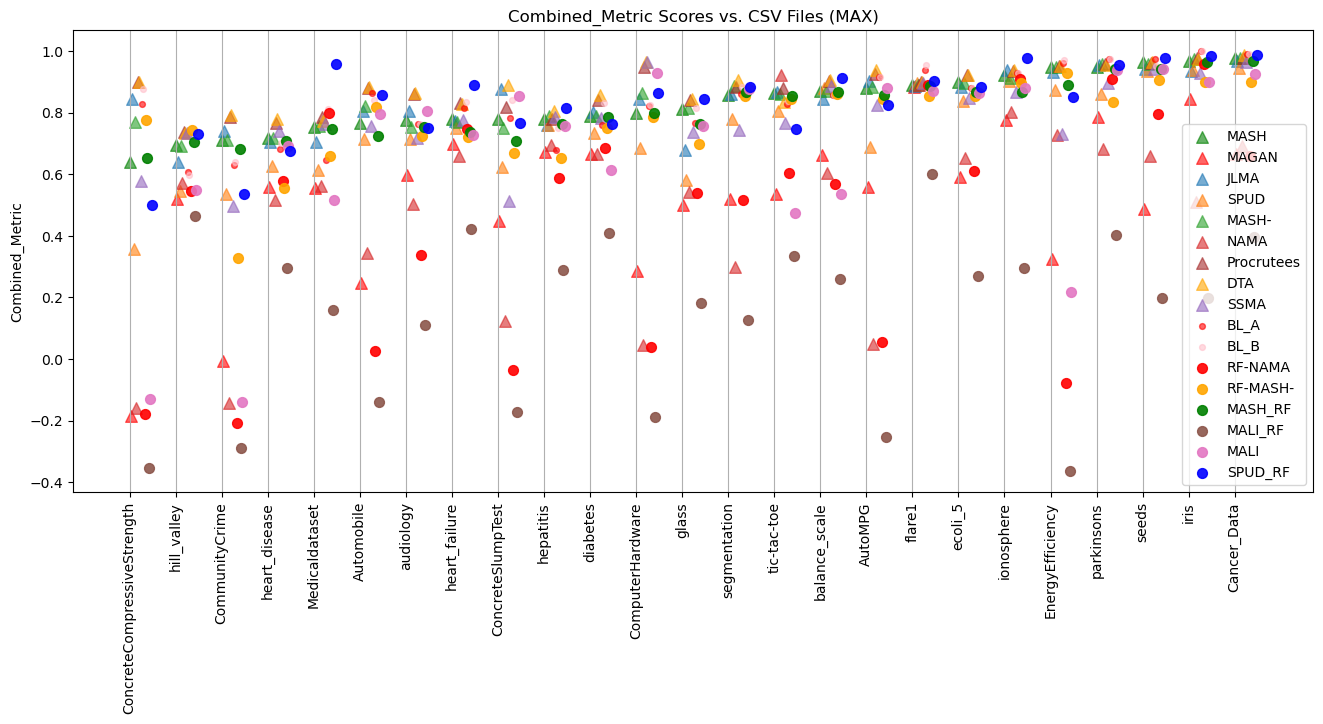

In [9]:
plt_methods_by_CSV_max(df = proc_df, metric = "Combined_Metric", return_df=False, plot_methods= ['SSMA', 'MAGAN', 'DTA', 'SPUD', 'MASH', 'MASH-', 'RF-MASH-',
       'NAMA', 'RF-NAMA', 'PCR', 'JLMA', 'MASH_RF', 'MALI_RF', 'MALI',
       'SPUD_RF', 'BL_A', 'BL_B'])

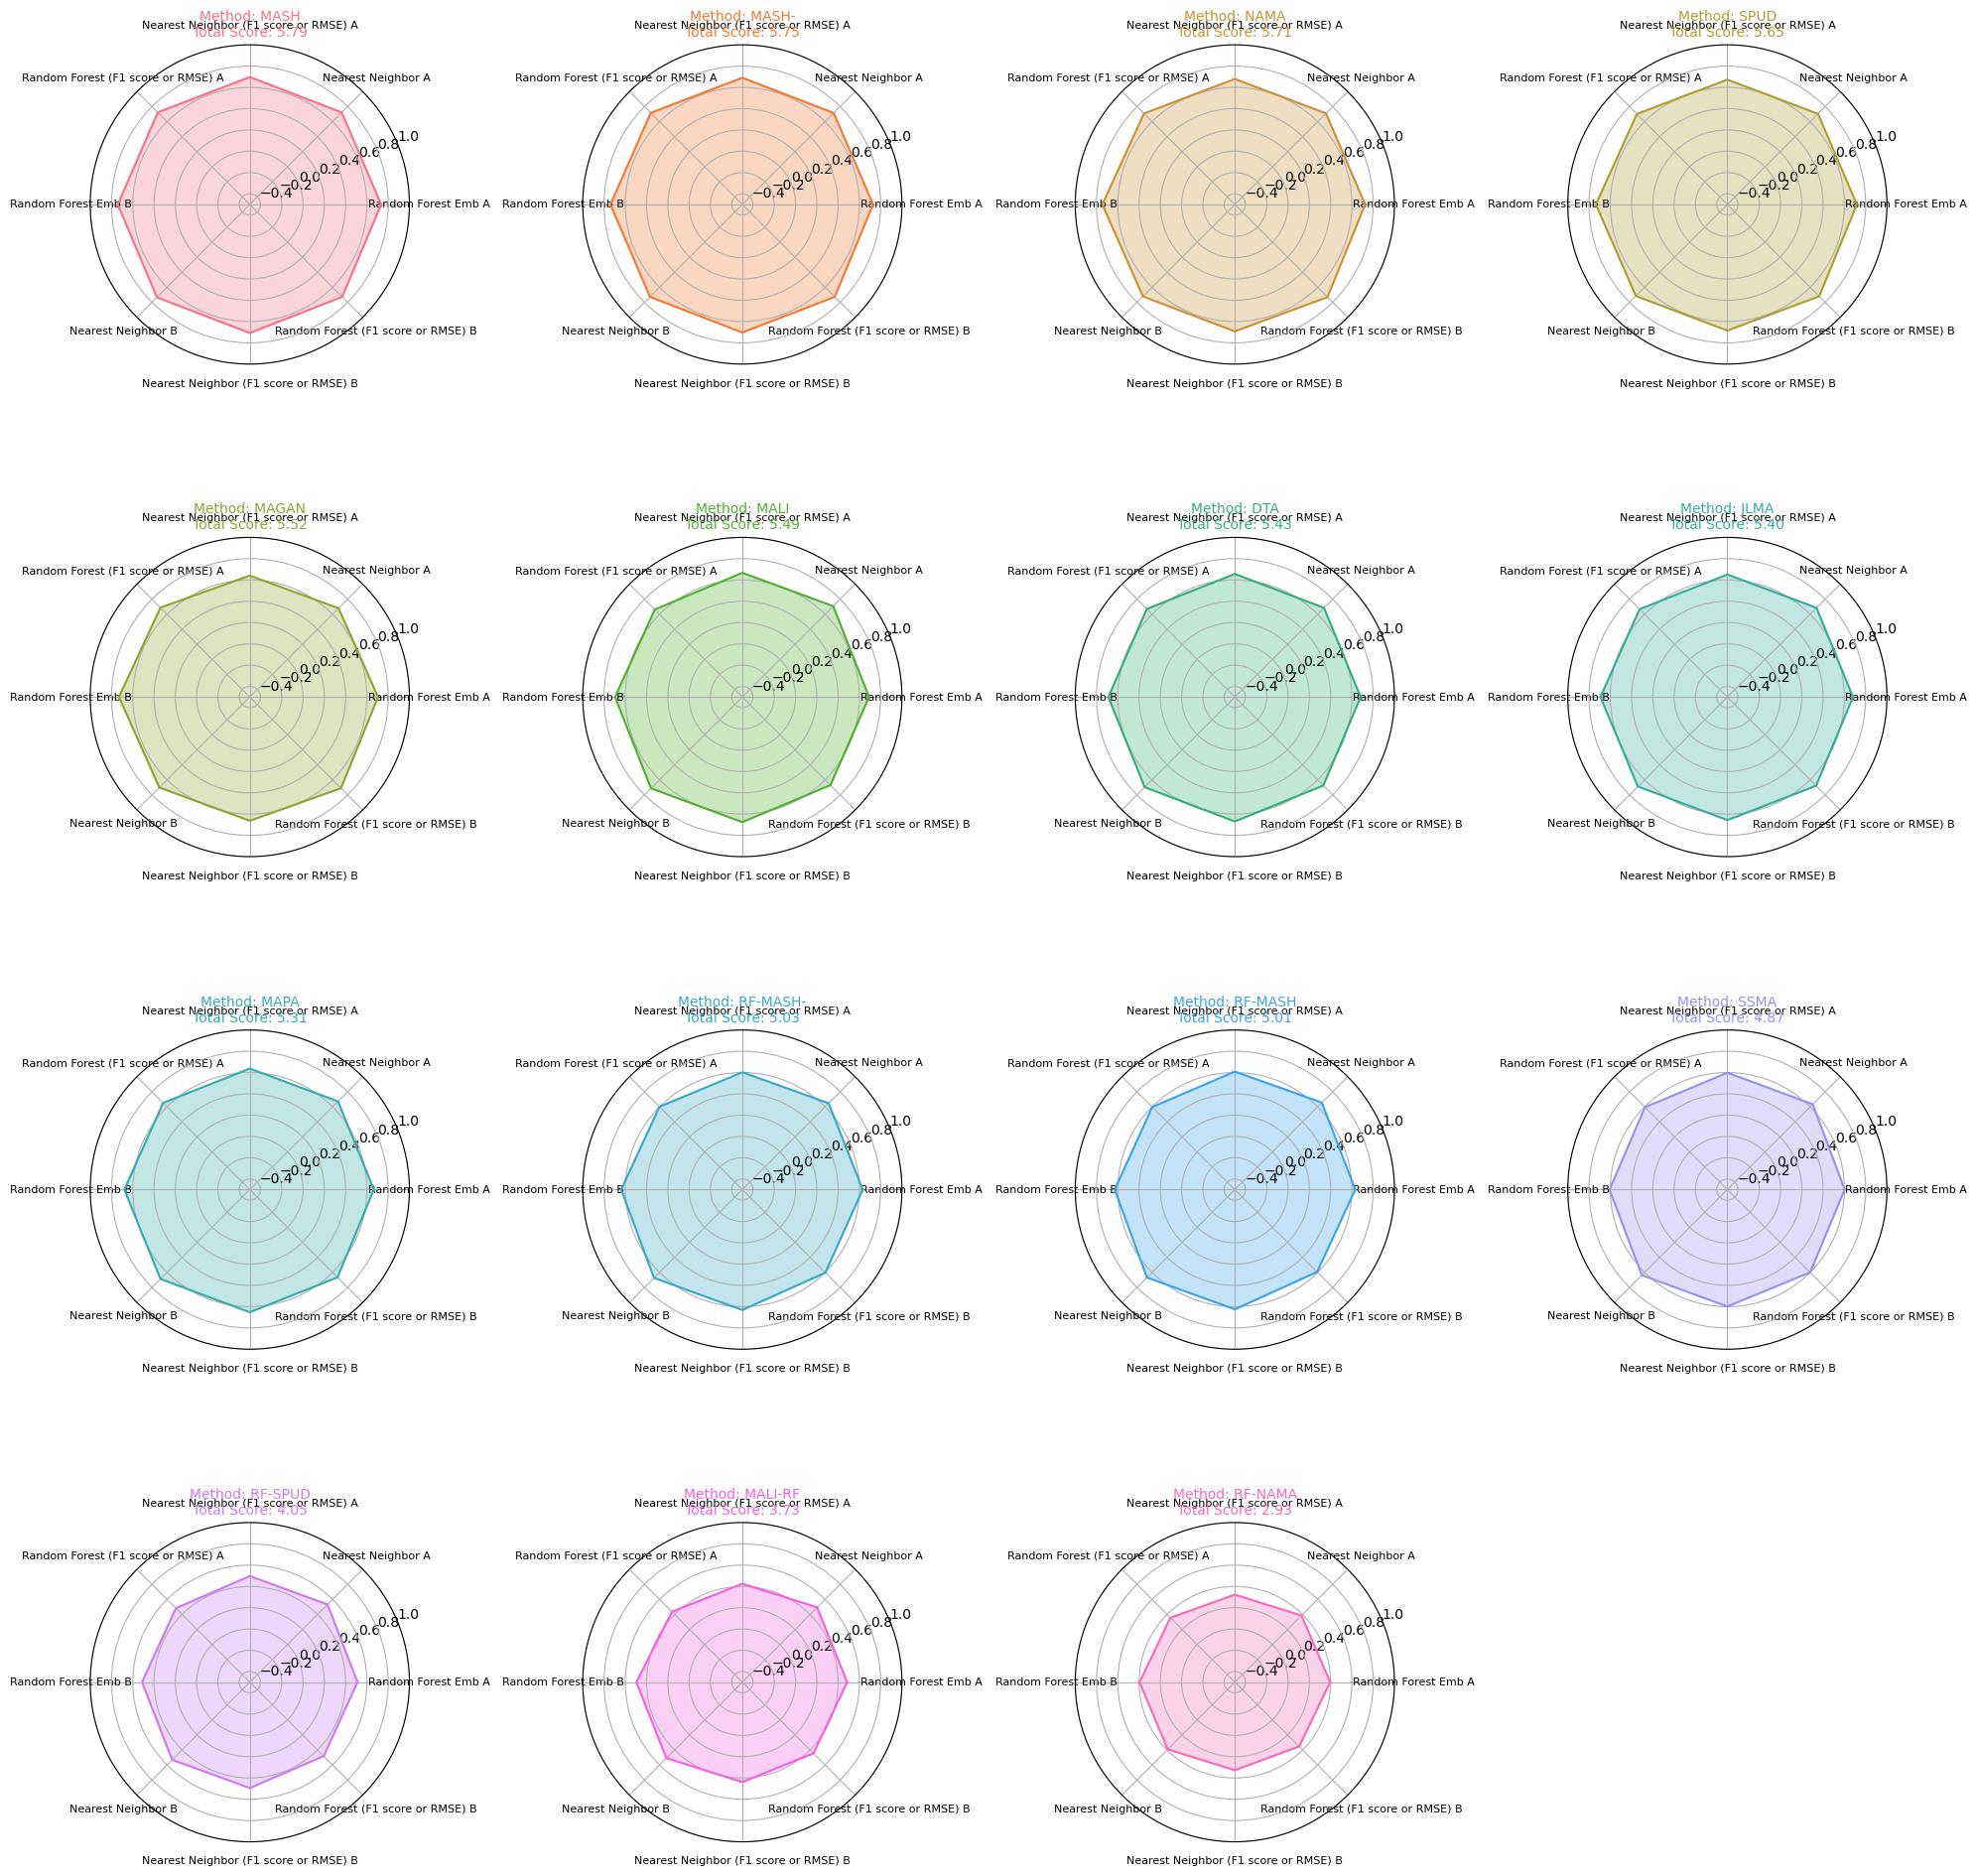

In [10]:
plot_radial(classification_df, [#'CE', 'FOSCTTM', 
                                #'Random Forest OOB', 
                                'Random Forest Emb A', 'Nearest Neighbor A', 'Nearest Neighbor (F1 score or RMSE) A', 'Random Forest (F1 score or RMSE) A',
                                'Random Forest Emb B', 'Nearest Neighbor B', 'Nearest Neighbor (F1 score or RMSE) B', 'Random Forest (F1 score or RMSE) B'])

In [11]:
# Rank each column's scores in results_df against each other
ranked_df = results_df.copy().set_index('csv_file').T
for col in ranked_df.columns:
    ranked_df[col] = ranked_df[col].rank(ascending=False)
ranked_df = ranked_df.T.reset_index()

ranked_df

,csv_file,SSMA,MAGAN,DTA,SPUD,MASH,MASH-,RF-MASH-,NAMA,RF-NAMA,PCR,JLMA,MASH_RF,MALI_RF,MALI,SPUD_RF,BL_A,BL_B
0,ConcreteCompressiveStrength,10.0,16.0,2.0,12.0,9.0,7.0,6.0,14.0,15.0,1.0,4.0,8.0,17.0,13.0,11.0,5.0,3.0
1,hill_valley,4.0,16.0,3.0,14.0,7.0,8.0,1.0,12.0,15.0,2.0,9.0,6.0,17.0,13.0,5.0,10.0,11.0
2,CommunityCrime,11.0,13.0,1.0,10.0,5.0,4.0,12.0,15.0,16.0,2.0,3.0,6.0,17.0,14.0,9.0,8.0,7.0
3,heart_disease,3.0,14.0,1.0,12.0,4.5,4.5,15.0,16.0,13.0,2.0,7.0,6.0,17.0,9.0,11.0,10.0,8.0
4,Medicaldataset,6.0,15.0,5.0,13.0,8.0,7.0,11.0,14.0,3.0,4.0,10.0,9.0,17.0,16.0,1.0,12.0,2.0
5,Automobile,11.0,15.0,1.0,13.0,10.0,6.0,7.0,14.0,16.0,2.0,8.0,12.0,17.0,9.0,4.0,3.0,5.0
6,audiology,12.0,14.0,1.0,13.0,5.0,8.0,11.0,15.0,16.0,2.0,3.0,9.0,17.0,4.0,10.0,6.5,6.5
7,heart_failure,7.0,15.0,4.0,10.0,6.0,9.0,14.0,16.0,11.0,3.0,8.0,12.0,17.0,13.0,1.0,5.0,2.0
8,ConcreteSlumpTest,13.0,14.0,1.0,12.0,7.0,9.0,11.0,15.0,16.0,5.0,2.0,10.0,17.0,3.0,8.0,6.0,4.0
9,hepatitis,4.0,14.0,2.0,8.0,5.0,3.0,15.0,12.0,16.0,6.0,9.0,7.0,17.0,10.0,1.0,13.0,11.0


<Axes: >

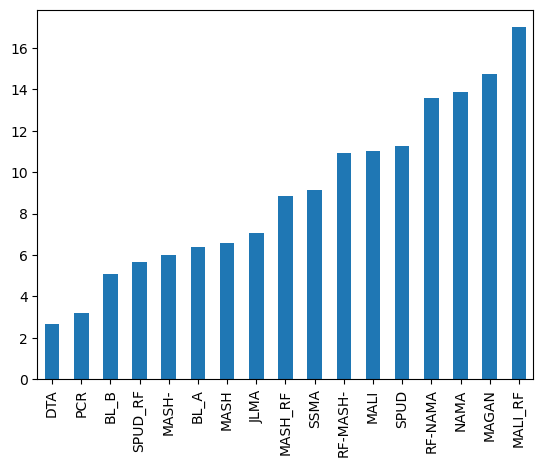

In [12]:
ranked_df.drop(columns= ["csv_file"]).mean().sort_values().plot(kind="bar")

# Helpful data frames


Baseline Scores and their meaning: (Adam doesn't think you should worry too much about these... he can work on these visualizations if they are even wanted)
- A_Classification_Score: Doesn't use an embedding at all. Is simply a KNN set to 4 which uses a train test split of 0.8 to predict on domain A.
- B_Classification_Score: Same thing as A but for B. 

Scores and their meanings
- Random Forest OOB: Is the OOB score from the RF trained against the full embedding (No training or test splits)
- Random Forest Emb A/B: The embedding is calculated with all of the points (No test or train). Then the embedding is split into a train/test. Uses data from both domains to predict points only from domain A or B using a RF algorthim (and is that score).
- Nearest Neighbor A/B: The embedding is calculated with all the points (no test or train). The embedding is then split into a train /test with equal representation from both domains. It uses all of the train data to predict on just one of the test A/B using the KNN algorithm where k = 1/30 of the dataset length. 
- NN (f1 score or RMSE): Depending on data set type, (regression or classification) its either the f1 score or RMSE. These are calculated with the same model as the Nearest Neighbor model from above. 
- RF (F1 score or RMSE): Exact same as the NN one, but using the random Forest model from above.

GRAE Scores and their meanings
- Same structure as the above scores. (The ones labeled as Metric are the F1 or RMSE scores).
- Instead of having the embedding trained on both the test and train data like the above, the embedding is only using the train data
- The Test data is then passed through GRAE networks to make the predictions. 
- This is more "Fair" and less "cheaty" than the above, because the tests points are never seen before the scoring.

In [13]:
proc_df.columns

Index(['method', 'csv_file', 'split', 'Percent_of_Anchors', 'CE', 'FOSCTTM',
       'Random Forest OOB', 'Random Forest Emb A', 'Random Forest Emb B',
       'Nearest Neighbor A', 'Nearest Neighbor B',
       'Nearest Neighbor (F1 score or RMSE) A',
       'Nearest Neighbor (F1 score or RMSE) B',
       'Random Forest (F1 score or RMSE) A',
       'Random Forest (F1 score or RMSE) B', 'Combined_Metric',
       'A_Classification_Score', 'B_Classification_Score', 'Grae-KNN-metric_A',
       'Grae-KNN-metric_B', 'Grae-KNN_A', 'Grae-KNN_B', 'Grae-RF-OOB',
       'Grae-RF-metric_A', 'Grae-RF-metric_B', 'Grae-RF_A', 'Grae-RF_B'],
      dtype='object')

In [14]:
# All the data
proc_df.sample(5)

,method,csv_file,split,Percent_of_Anchors,CE,FOSCTTM,Random Forest OOB,Random Forest Emb A,Random Forest Emb B,Nearest Neighbor A,...,B_Classification_Score,Grae-KNN-metric_A,Grae-KNN-metric_B,Grae-KNN_A,Grae-KNN_B,Grae-RF-OOB,Grae-RF-metric_A,Grae-RF-metric_B,Grae-RF_A,Grae-RF_B
6999,JLMA,iris,distort,0.3,0.968000,0.033218,0.955833,0.953333,0.966667,0.973333,...,0.966667,0.980017,0.966513,0.980000,0.966667,0.945833,0.959863,0.965764,0.960000,0.966667
6173,NAMA,glass,random,0.3,0.347664,0.001232,0.566667,0.581395,0.562791,0.493023,...,0.697674,0.452768,0.508092,0.520930,0.562791,0.549123,0.515712,0.598045,0.544186,0.632558
10966,RF-MASH,diabetes,distort,0.3,0.722396,0.007815,0.787296,0.676623,0.592208,0.700000,...,0.759740,0.747957,0.757154,0.746753,0.754545,0.794625,0.724401,0.744660,0.725974,0.745455
13094,SPUD,diabetes,turn,0.3,0.694010,0.000002,0.728176,0.728571,0.729870,0.742857,...,0.694805,0.716392,0.703048,0.727273,0.711688,0.712541,0.725982,0.727411,0.733766,0.736364
9129,RF-SPUD,audiology,turn,0.3,0.380000,0.000000,0.792105,0.615789,0.557895,0.589474,...,0.684211,0.427306,0.496920,0.489474,0.547368,0.778289,0.487228,0.551922,0.568421,0.626316


In [15]:
classification_df.sample(5)

,method,csv_file,split,Percent_of_Anchors,CE,FOSCTTM,Random Forest OOB,Random Forest Emb A,Random Forest Emb B,Nearest Neighbor A,...,B_Classification_Score,Grae-KNN-metric_A,Grae-KNN-metric_B,Grae-KNN_A,Grae-KNN_B,Grae-RF-OOB,Grae-RF-metric_A,Grae-RF-metric_B,Grae-RF_A,Grae-RF_B
8585,RF-MASH,tic-tac-toe,distort,0.3,0.835073,0.000087,0.907180,0.342708,0.340625,0.340625,...,0.817708,0.798670,0.739880,0.798958,0.745833,0.933290,0.777866,0.703031,0.790625,0.735417
11840,RF-NAMA,segmentation,distort,0.3,0.502370,0.000000,0.789286,0.255814,0.255814,0.195349,...,0.744186,0.738349,0.649299,0.767442,0.683721,0.763095,0.750984,0.687172,0.767442,0.706977
13838,NAMA,ionosphere,turn,0.3,0.803419,0.000008,0.911429,0.938028,0.932394,0.890141,...,0.859155,0.808044,0.846844,0.816901,0.853521,0.905357,0.914121,0.868804,0.915493,0.873239
8458,MALI,balance_scale,random,0.3,0.643200,0.500185,0.628600,0.651200,0.633600,0.704000,...,0.696000,0.632430,0.638638,0.664000,0.672000,0.635400,0.603980,0.598081,0.638400,0.609600
5032,RF-MASH-,tic-tac-toe,even,0.3,0.670146,0.216395,0.765666,0.776042,0.677083,0.640625,...,0.661458,0.569940,0.593117,0.645833,0.656250,0.760444,0.718045,0.615747,0.734375,0.640625


In [16]:
regression_df.sample(5)

,method,csv_file,split,Percent_of_Anchors,CE,FOSCTTM,Random Forest OOB,Random Forest Emb A,Random Forest Emb B,Nearest Neighbor A,...,B_Classification_Score,Grae-KNN-metric_A,Grae-KNN-metric_B,Grae-KNN_A,Grae-KNN_B,Grae-RF-OOB,Grae-RF-metric_A,Grae-RF-metric_B,Grae-RF_A,Grae-RF_B
2668,MASH-,CommunityCrime,random,0.3,0.533529,0.043842,0.559282,0.548627,0.546917,0.546622,...,0.534489,0.609652,0.608286,0.578726,0.580390,0.584379,0.613156,0.612521,0.573745,0.573929
5216,SPUD,ConcreteSlumpTest,random,0.3,-0.153549,0.000057,0.033544,0.002532,-0.018363,0.035915,...,0.656244,0.916639,0.835631,-0.023493,0.122212,-0.076115,0.956244,0.864237,-0.111529,0.054046
15137,MAGAN,ConcreteCompressiveStrength,turn,0.3,-0.450979,0.000058,0.667174,0.629804,0.637922,0.336120,...,0.826641,0.779072,0.775304,0.342436,0.348868,0.665601,0.603798,0.592476,0.604772,0.619460
1462,MASH,AutoMPG,even,0.3,0.730037,0.056083,0.781728,0.727257,0.688513,0.791950,...,0.740241,0.501518,0.531172,0.699805,0.663255,0.770399,0.498367,0.557879,0.703565,0.628541
12003,MASH-,EnergyEfficiency,random,0.3,0.341242,0.222748,0.611041,0.580962,0.571727,0.519487,...,0.944099,0.685411,0.695573,0.487180,0.439977,0.611720,0.669015,0.765917,0.518764,0.319186


# Marshall's Visualizations

### Story number one: How close GRAE's Out of Bag Score is to the Model's

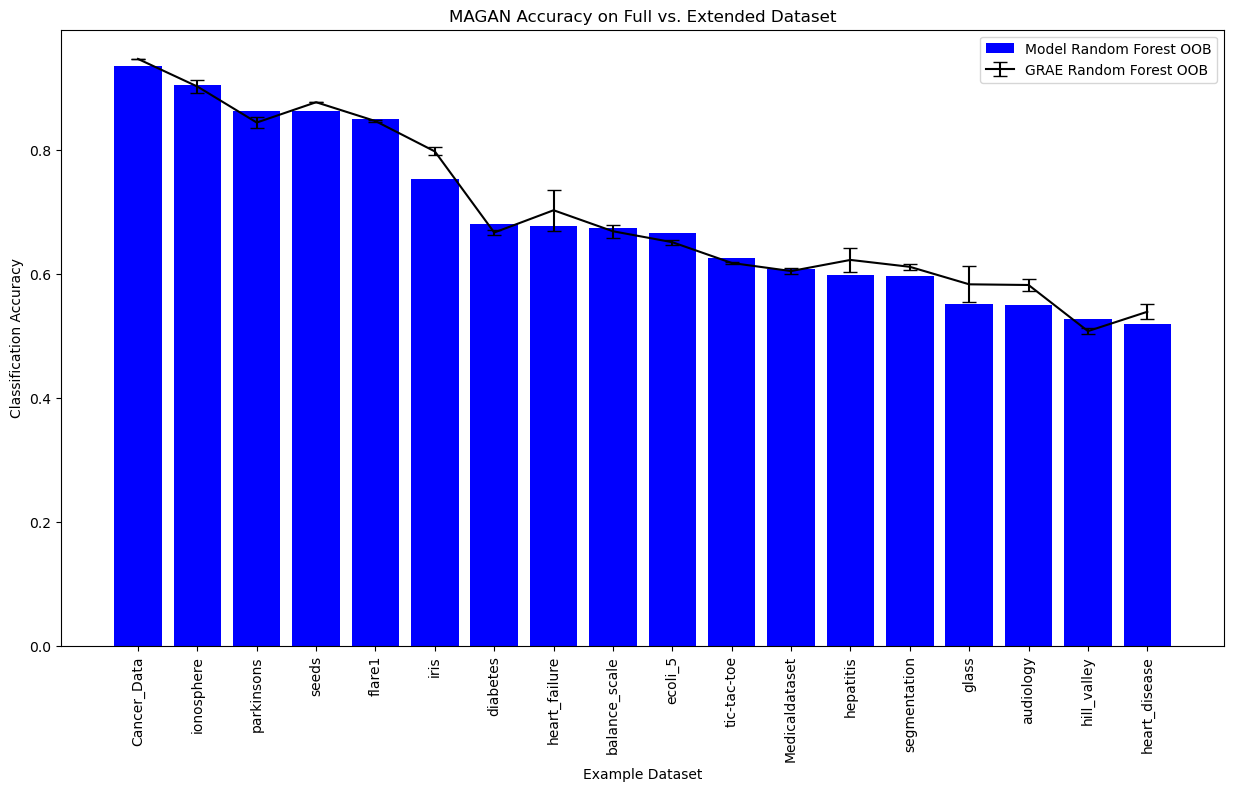

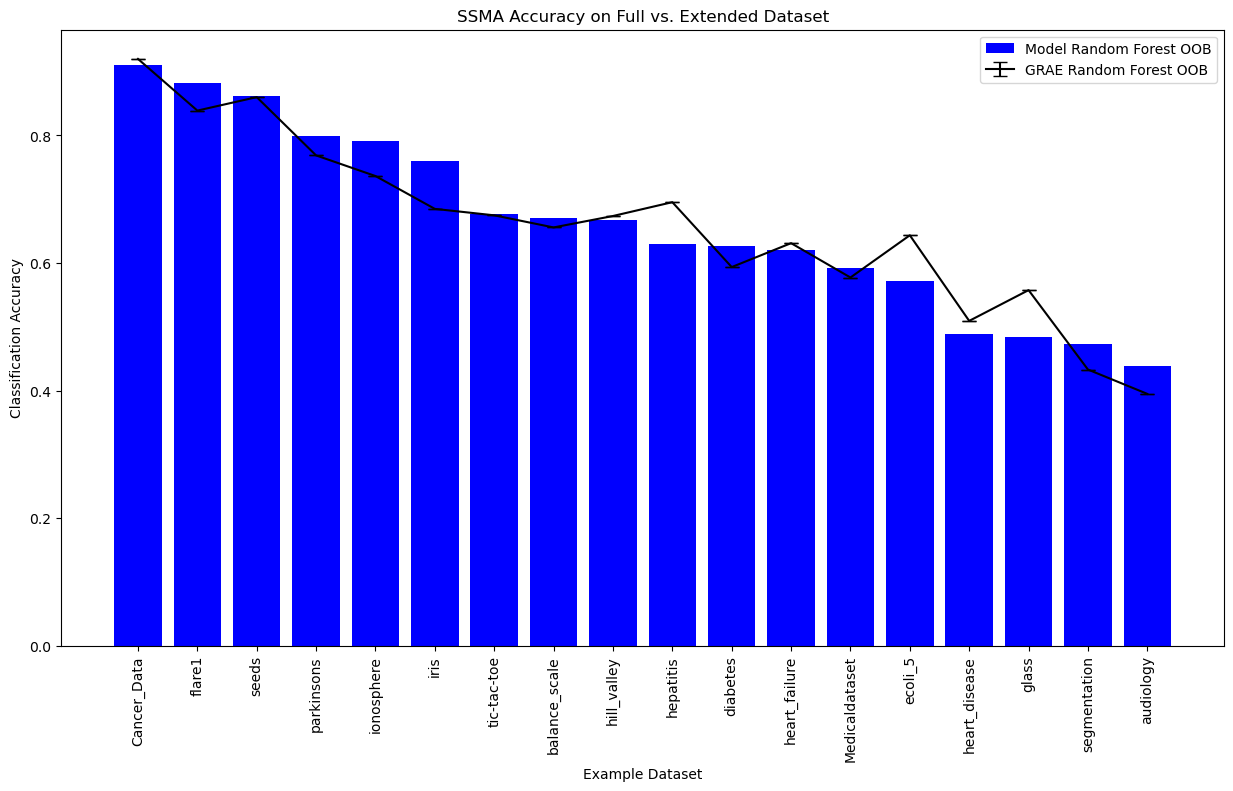

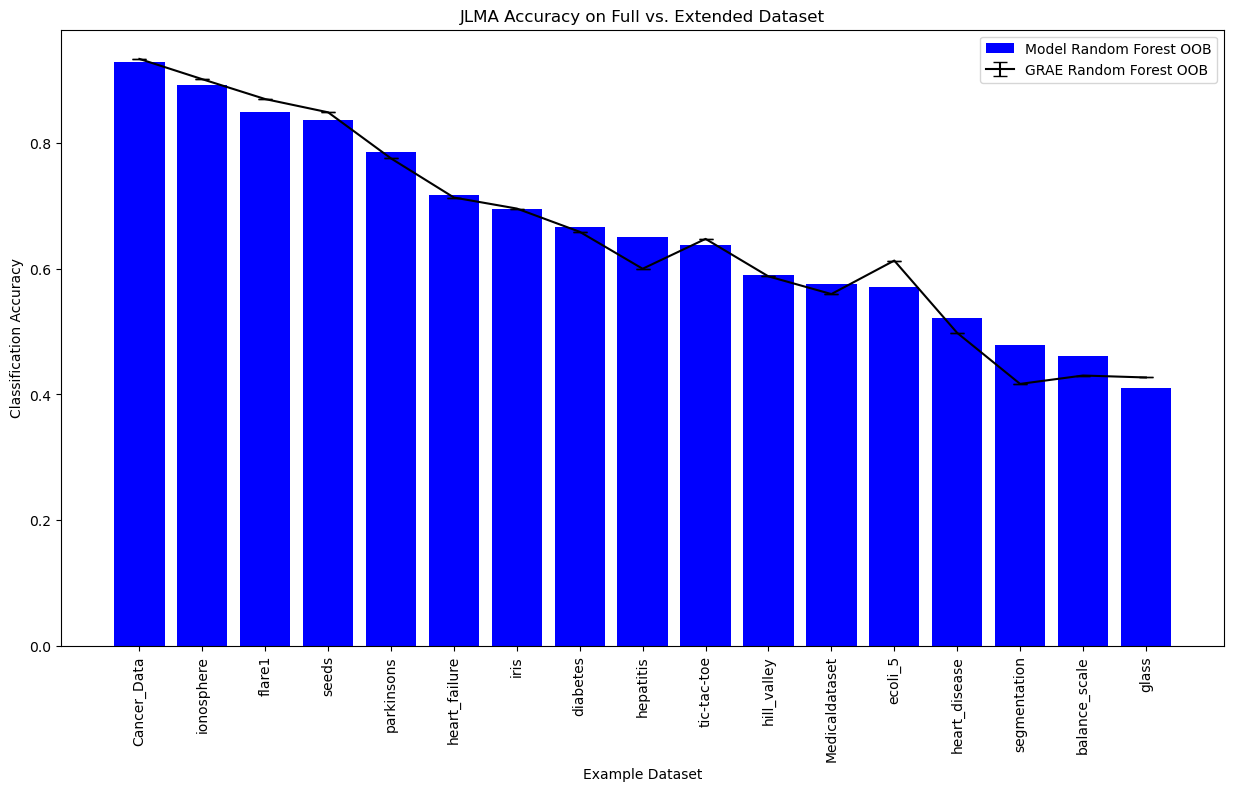

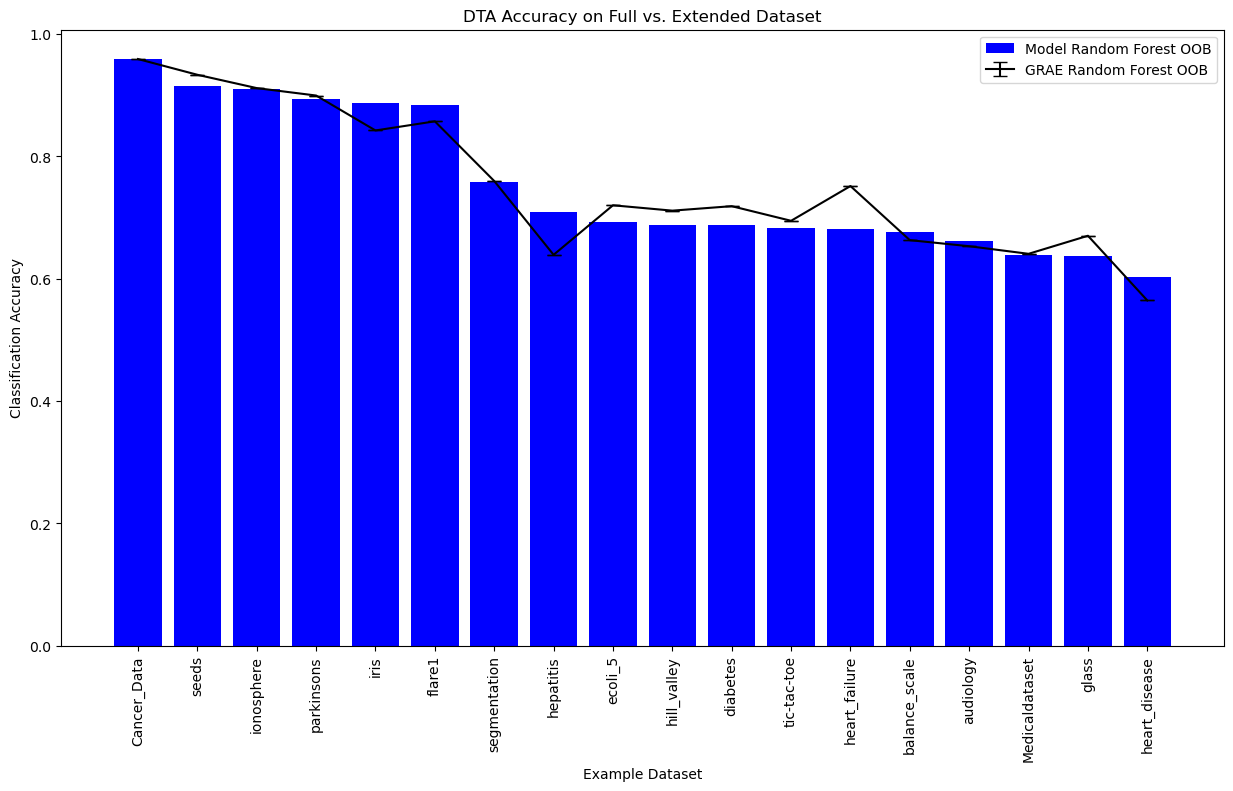

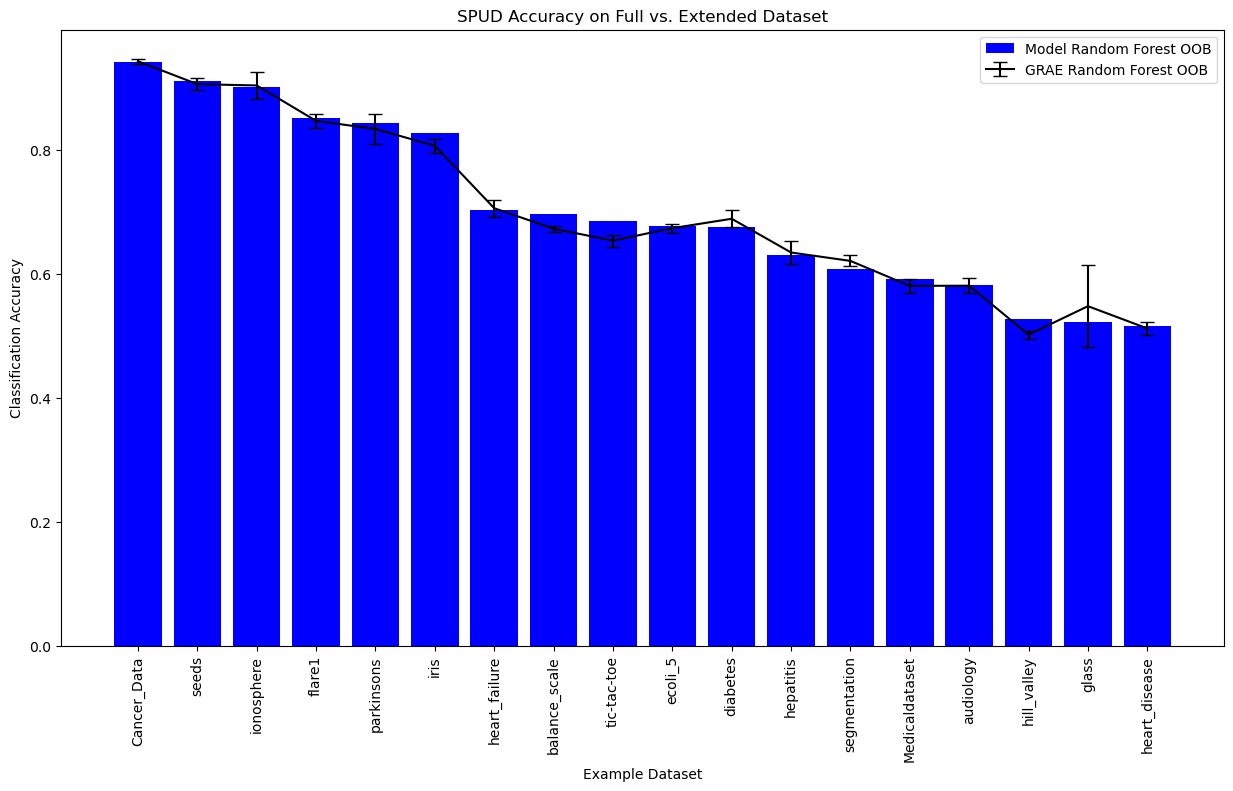

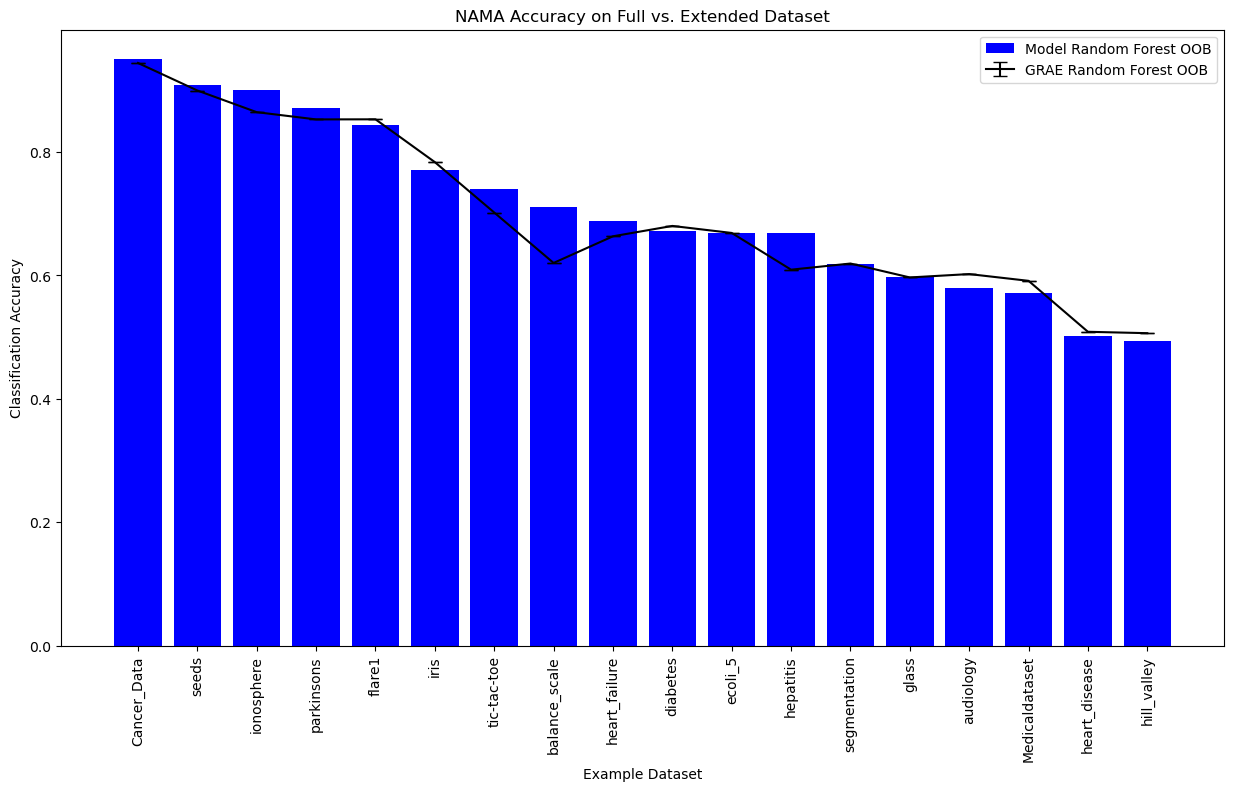

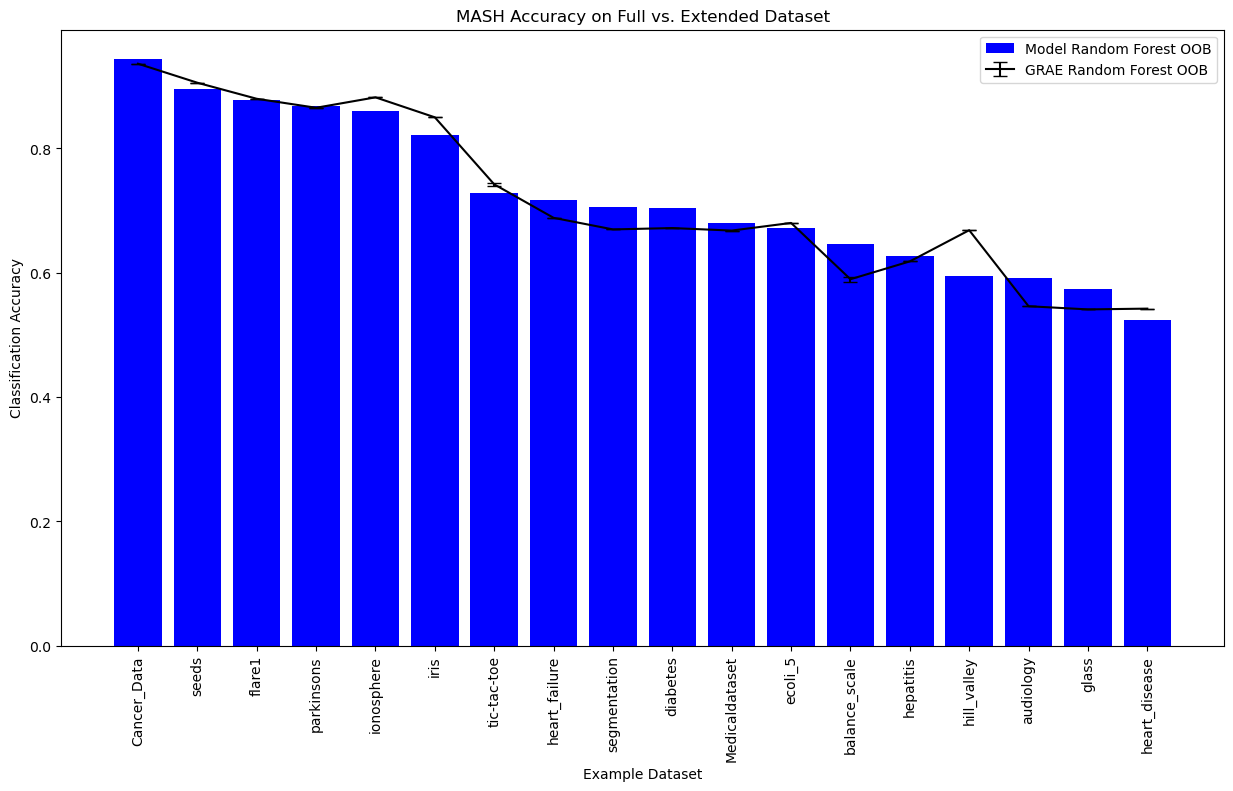

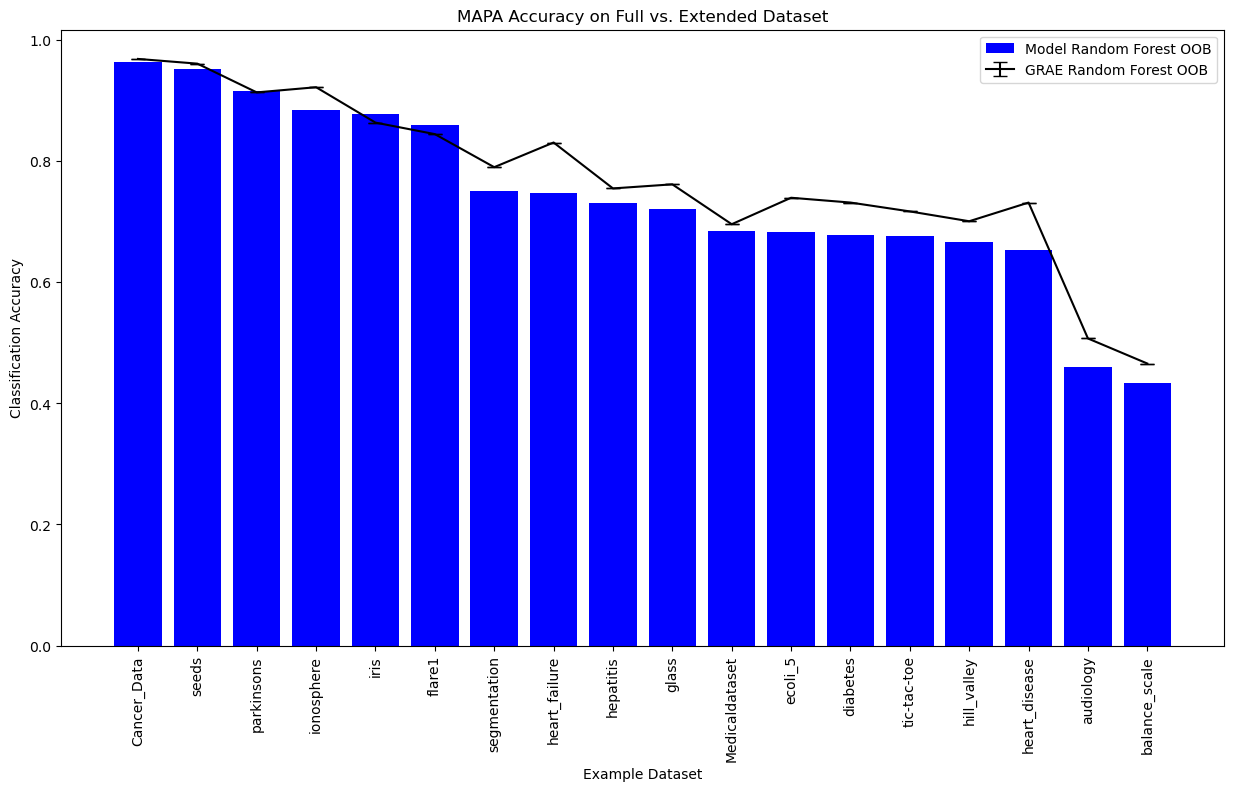

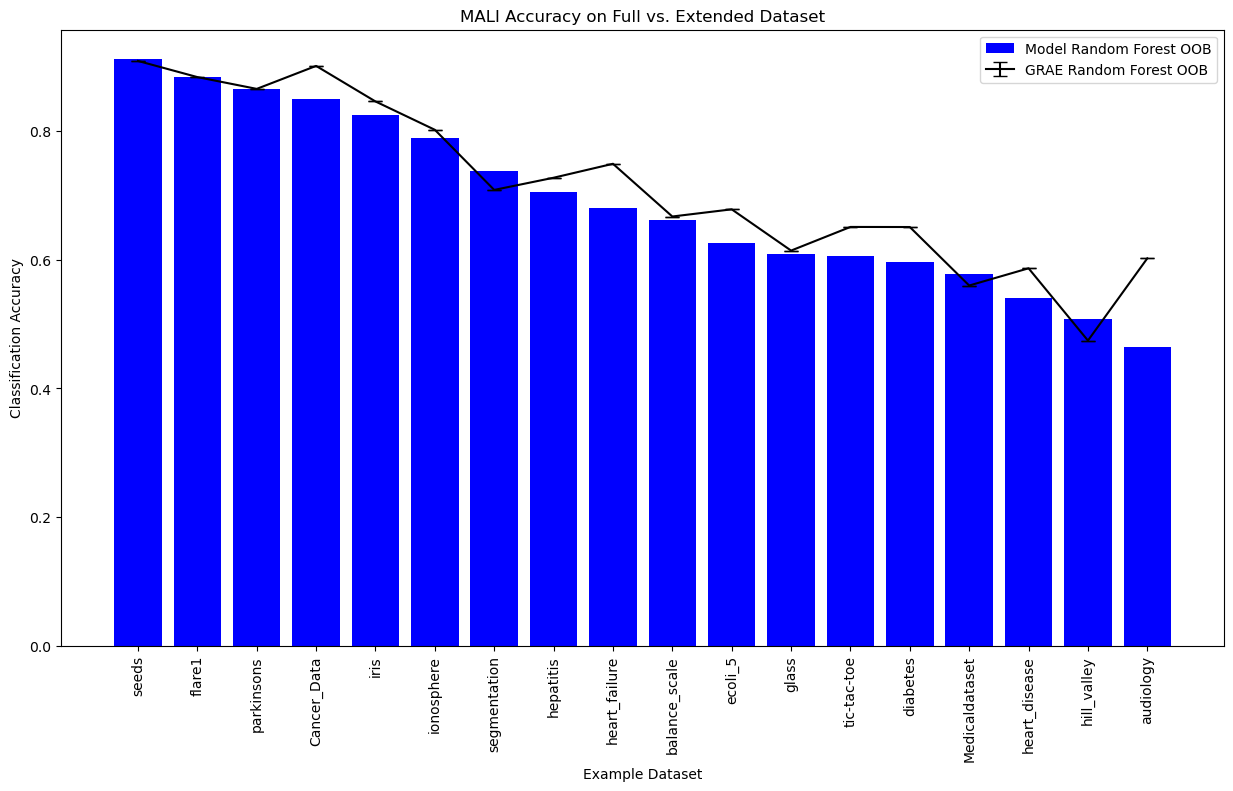

"\nReally the only trouble here is that error bars aren't very meaningful when we're only aggregating across the 5 split types\nAnything else that we do it across is going to be unfair because the score for GRAE is going to follow the score for\nthe model itself and so it'll look like there's a ton of inaccuracy there when it's really that the model's score itself\nis just changing\n"

In [57]:
# Collect the average domain scores and the out of bag scores both with and without GRAE
relavent_models_df = classification_df[~classification_df["method"].isin(['MALI-RF', 'RF-MASH', 'RF-MASH-', 'RF-NAMA', 'RF-SPUD', 'MASH-'])]
for method in relavent_models_df["method"].unique():
    mash_random_scores = subset_df(classification_df, method = method, split = "skewed")
    important_scores = mash_random_scores[["csv_file", "Random Forest OOB", "Grae-RF-OOB"]].copy()
    score_summaries = important_scores.groupby("csv_file").agg(["mean", "std"])
    score_summaries.sort_values(by=("Random Forest OOB", "mean"), ascending=False, inplace=True)

    # Plot the A_Classification_Score for each csv_file
    plt.figure(figsize=(15, 8))
    plt.bar(score_summaries.index, score_summaries["Random Forest OOB"]["mean"], color='blue')
    plt.errorbar(score_summaries.index, score_summaries["Grae-RF-OOB"]["mean"], yerr=score_summaries["Grae-RF-OOB"]["std"], 
                color='black', capsize=5)
    plt.title(f'{method} Accuracy on Full vs. Extended Dataset')
    plt.xlabel('Example Dataset')
    plt.ylabel('Classification Accuracy')
    plt.xticks(rotation=90)
    plt.legend(['Model Random Forest OOB', 'GRAE Random Forest OOB'])
    plt.show()

"""
Really the only trouble here is that error bars aren't very meaningful when we're only aggregating across the 5 split types
Anything else that we do it across is going to be unfair because the score for GRAE is going to follow the score for
the model itself and so it'll look like there's a ton of inaccuracy there when it's really that the model's score itself
is just changing
"""

### Story Number Two: How GRAE's Accuracy Changes Acress Models, Datasets, and Split Types

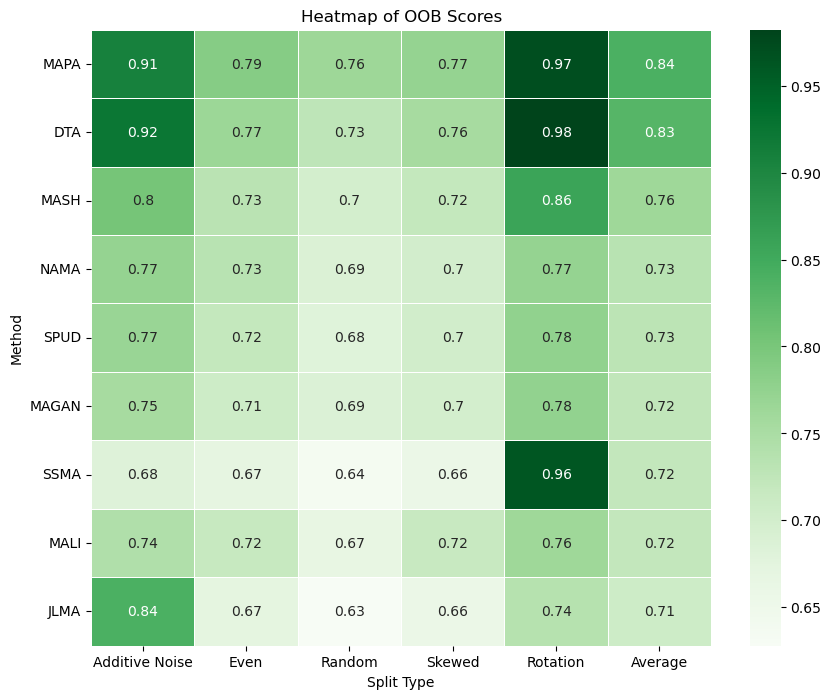

In [20]:
all_scores = subset_df(classification_df)
important_scores = all_scores[["method", "split", "A_Classification_Score", "B_Classification_Score", "Random Forest OOB", "Grae-RF-OOB"]].copy()
averaged_scores = important_scores.groupby(["method", "split"]).mean()
grae_heatmap_scores = averaged_scores["Grae-RF-OOB"].unstack()
#get rid of methods that we don't want to include, for now
grae_heatmap_scores = grae_heatmap_scores[~grae_heatmap_scores.index.isin(['MALI-RF', 'RF-MASH', 'RF-MASH-', 'RF-NAMA', 'RF-SPUD', 'MASH-'])]
#create an avarage column and sort by it
grae_heatmap_scores['Average'] = grae_heatmap_scores.mean(axis=1)
grae_heatmap_scores.sort_values(by='Average', ascending=False, inplace=True)

# Create the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(grae_heatmap_scores, annot=True, cmap='Greens', linewidths=.5)
plt.title('Heatmap of OOB Scores')
plt.xlabel('Split Type')
plt.xticks(ha="center", ticks=[0.5,1.5,2.5,3.5,4.5,5.5], labels=["Additive Noise", "Even", "Random", "Skewed", "Rotation", "Average"])
plt.ylabel('Method')
plt.yticks(rotation=0)
plt.show()

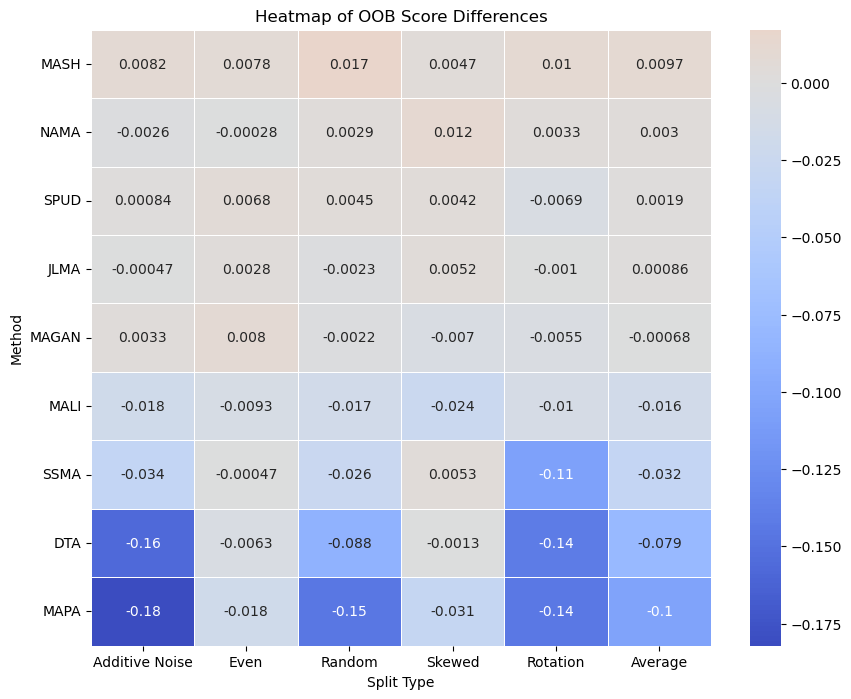

In [ ]:
all_scores = subset_df(classification_df)
important_scores = all_scores[["method", "split", "A_Classification_Score", "B_Classification_Score", "Random Forest OOB", "Grae-RF-OOB"]].copy()
averaged_scores = important_scores.groupby(["method", "split"]).mean()
model_heatmap_scores = averaged_scores["Random Forest OOB"].unstack()
#get rid of methods that we don't want to include, for now
model_heatmap_scores = model_heatmap_scores[~model_heatmap_scores.index.isin(['MALI-RF', 'RF-MASH', 'RF-MASH-', 'RF-NAMA', 'RF-SPUD', 'MASH-'])]
#create an avarage column and sort by it
model_heatmap_scores['Average'] = model_heatmap_scores.mean(axis=1)
model_heatmap_scores.sort_values(by='Average', ascending=False, inplace=True)

difference_heatmap_scores = model_heatmap_scores - grae_heatmap_scores
difference_heatmap_scores.sort_values(by='Average', ascending=False, inplace=True)

# Create the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(difference_heatmap_scores, annot=True, cmap='coolwarm', center=0, linewidths=.5)
plt.title('Heatmap of OOB Score Differences')
plt.xlabel('Split Type')
plt.xticks(ha="center", ticks=[0.5,1.5,2.5,3.5,4.5,5.5], labels=["Additive Noise", "Even", "Random", "Skewed", "Rotation", "Average"])
plt.ylabel('Method')
plt.yticks(rotation=0)
plt.show()

"""
Notice that MASH is the best model to use GRAE on at high accuracies! All of the other really accurate models suffer
large accuracy droms when GRAE is used.
"""